## 🎯 ETAPA 1: Configuração Inicial
### Passo 1.1: Importações e Configurações Iniciais


In [13]:
# Importação das bibliotecas necessárias
# pandas: manipulação e análise de dados
# numpy: operações matemáticas e arrays
# matplotlib e seaborn: visualização de dados
# sklearn: machine learning e métricas

# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Bibliotecas importadas com sucesso!")
print(f"✓ Versão do pandas: {pd.__version__}")
print(f"✓ Versão do numpy: {np.__version__}")

✓ Bibliotecas importadas com sucesso!
✓ Versão do pandas: 2.3.3
✓ Versão do numpy: 2.3.3


In [24]:
# Configurações de visualização para melhor apresentação
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

### Passo 1.2: Carregamento e Primeira Visualização dos Dados

In [22]:
# Carregamento dos dados
# Usamos o caminho relativo para facilitar o compartilhamento do projeto
df =pd.read_csv('C:/Users/bianc/OneDrive/Documents/2-Projetos/08_Regression_Applied_to_Materials_Engineering/Regression_Applied_to_Materials_Engineering/dataset/dados_concreto_-_Sheet1.csv')

In [ ]:
# Carregamento dos dados

print("=" * 80)
print("INFORMAÇÕES GERAIS DO DATASET")
print("=" * 80)
print(f"\n📊 Dimensões do dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"📦 Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")



INFORMAÇÕES GERAIS DO DATASET

📊 Dimensões do dataset: 2029 linhas x 10 colunas
📦 Tamanho em memória: 265.46 KB


In [25]:
# Primeira visualização dos dados

print("\nPrimeiras 5 linhas:")
df.head()



Primeiras 5 linhas:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,Alto
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,Alto
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,Baixa
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,Baixa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,Baixa


In [10]:
print("\nInformações sobre os tipos de dados:")
df.info()


Informações sobre os tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2029 non-null   float64
 1   Blast Furnace Slag             2029 non-null   float64
 2   Fly Ash                        2029 non-null   float64
 3   Water                          2029 non-null   float64
 4   Superplasticizer               2029 non-null   float64
 5   Coarse Aggregate               2029 non-null   float64
 6   Fine Aggregate                 2029 non-null   float64
 7   Age                            2029 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2029 non-null   object 
dtypes: float64(9), object(1)
memory usage: 158.6+ KB


In [12]:
print("\nEstatísticas descritivas:")
df.describe()


Estatísticas descritivas:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2020.000000
mean,415.147610,107.776688,78.604091,264.240315,9.045293,1444.538492,1139.313258,67.255643,35.886683
std,237.133806,145.230234,106.149019,111.056771,10.239884,604.194394,481.913282,103.260526,16.860121
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.100000
25%,250.000000,0.000000,0.000000,182.000000,0.000000,967.100000,776.400000,14.000000,23.500000
50%,350.400000,26.000000,0.000000,206.000000,7.800000,1104.000000,889.000000,28.000000,34.675000
75%,512.400000,187.000000,136.200000,345.800000,13.600000,1911.800000,1502.800000,75.600000,46.230000
max,1487.600000,923.700000,500.900000,639.900000,83.700000,3150.000000,2779.300000,1022.000000,87.200000


In [18]:
print("\n" + "=" * 80)
print("TIPOS DE DADOS")
print("=" * 80)
print(df.dtypes)


TIPOS DE DADOS
Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                              float64
Concrete compressive strength    float64
Strength Category                 object
dtype: object


In [17]:
print("\n" + "=" * 80)
print("NOMES DAS COLUNAS")
print("=" * 80)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


NOMES DAS COLUNAS
1. Cement
2. Blast Furnace Slag
3. Fly Ash
4. Water
5. Superplasticizer
6. Coarse Aggregate
7. Fine Aggregate
8. Age
9. Concrete compressive strength
10. Strength Category


### Passo 1.3: Análise de Qualidade dos Dados


In [27]:
print("=" * 80)
print("ANÁLISE DE QUALIDADE DOS DADOS")
print("=" * 80)

# Verificação detalhada de valores ausentes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

quality_df = pd.DataFrame({
    'Valores Nulos': missing_values,
    'Percentual (%)': missing_percentage.round(2)
})

print("\n📋 VALORES AUSENTES POR COLUNA:")
print(quality_df)

ANÁLISE DE QUALIDADE DOS DADOS

📋 VALORES AUSENTES POR COLUNA:
                               Valores Nulos  Percentual (%)
Cement                                     0            0.00
Blast Furnace Slag                         0            0.00
Fly Ash                                    0            0.00
Water                                      0            0.00
Superplasticizer                           0            0.00
Coarse Aggregate                           0            0.00
Fine Aggregate                             0            0.00
Age                                        0            0.00
Concrete compressive strength              9            0.44
Strength Category                          0            0.00


In [42]:
print("\n📋 VALORES AUSENTES POR COLUNA:")
print(quality_df)

# Destacar colunas com valores ausentes
if quality_df['Valores Nulos'].sum() > 0:
    print("\n⚠️  ATENÇÃO: Valores ausentes encontrados!")
    print("\nColunas com problemas:")
    problematic_cols = quality_df[quality_df['Valores Nulos'] > 0]
    for col, row in problematic_cols.iterrows():
        print(f"  • {col}: {int(row['Valores Nulos'])} valores ausentes ({row['Percentual (%)']}%)")
else:
    print("\n✓ Excelente! Não há valores ausentes no dataset.")

# Verificação de duplicatas
print("\n" + "=" * 80)
print("ANÁLISE DE DUPLICATAS")
print("=" * 80)

if duplicates > 0:
    duplicate_percentage = (duplicates / len(df)) * 100
    print(f"   Percentual: {duplicate_percentage:.2f}%")
    print("\n⚠️  Recomenda-se investigar as duplicatas.")
    
    # Mostrar exemplo de duplicatas
    print("\n🔍 Exemplo de linhas duplicadas:")
    display(df[df.duplicated(keep=False)])
else:
    print("✓ Não há linhas duplicadas.")




📋 VALORES AUSENTES POR COLUNA:
                               Valores Nulos  Percentual (%)
Cement                                     0            0.00
Blast Furnace Slag                         0            0.00
Fly Ash                                    0            0.00
Water                                      0            0.00
Superplasticizer                           0            0.00
Coarse Aggregate                           0            0.00
Fine Aggregate                             0            0.00
Age                                        0            0.00
Concrete compressive strength              9            0.44
Strength Category                          0            0.00

⚠️  ATENÇÃO: Valores ausentes encontrados!

Colunas com problemas:
  • Concrete compressive strength: 9 valores ausentes (0.44%)

ANÁLISE DE DUPLICATAS
   Percentual: 1.23%

⚠️  Recomenda-se investigar as duplicatas.

🔍 Exemplo de linhas duplicadas:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
72,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40,Baixa
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40,Baixa
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3.0,33.40,Baixa
83,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30,Baixa
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30,Baixa
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30,Baixa
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.30,Baixa
95,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7.0,49.20,Baixa
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7.0,49.20,Baixa
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7.0,49.20,Baixa


In [43]:
# Estatísticas da variável alvo
print("\n" + "=" * 80)
print("ANÁLISE DA VARIÁVEL ALVO: Concrete compressive strength")
print("=" * 80)

target_stats = df['Concrete compressive strength'].describe()
print("\n📊 Estatísticas:")
print(target_stats)

print(f"\n📈 Amplitude: {target_stats['max'] - target_stats['min']:.2f} MPa")
print(f"📊 Coeficiente de Variação: {(target_stats['std'] / target_stats['mean'] * 100):.2f}%")


ANÁLISE DA VARIÁVEL ALVO: Concrete compressive strength

📊 Estatísticas:
count    2020.000000
mean       35.886683
std        16.860121
min         2.100000
25%        23.500000
50%        34.675000
75%        46.230000
max        87.200000
Name: Concrete compressive strength, dtype: float64

📈 Amplitude: 85.10 MPa
📊 Coeficiente de Variação: 46.98%


In [44]:
# Verificar distribuição por categoria
print("\n" + "=" * 80)
print("DISTRIBUIÇÃO POR CATEGORIA DE RESISTÊNCIA")
print("=" * 80)

category_counts = df['Strength Category'].value_counts()
category_percentage = (category_counts / len(df) * 100).round(2)

distribution_df = pd.DataFrame({
    'Quantidade': category_counts,
    'Percentual (%)': category_percentage
})

print("\n📊 Distribuição:")
print(distribution_df)

# Verificar se há categorias além de "Alto" e "Baixa"
unique_categories = df['Strength Category'].unique()
print(f"\n🏷️  Categorias únicas: {list(unique_categories)}")


DISTRIBUIÇÃO POR CATEGORIA DE RESISTÊNCIA

📊 Distribuição:
                   Quantidade  Percentual (%)
Strength Category                            
Baixa                    1840           90.69
Alto                      189            9.31

🏷️  Categorias únicas: ['Alto', 'Baixa']


### Passo 1.4: Tratamento dos Dados
Remover os valores ausentes e preparar os dados para análise.

In [49]:
print("=" * 80)
print("TRATAMENTO DE DADOS")
print("=" * 80)

# Salvando informações antes do tratamento
original_shape = df.shape
original_nulls = df['Concrete compressive strength'].isnull().sum()

print(f"\n📊 Dados originais: {original_shape[0]} linhas x {original_shape[1]} colunas")
print(f"⚠️  Valores ausentes na variável alvo: {original_nulls}")

# Removendo valores ausentes da variável alvo
df_clean = df.dropna(subset=['Concrete compressive strength']).copy()

print(f"\n✓ Dados após limpeza: {df_clean.shape[0]} linhas x {df_clean.shape[1]} colunas")
print(f"✓ Linhas removidas: {original_shape[0] - df_clean.shape[0]}")
print(f"✓ Percentual mantido: {(df_clean.shape[0] / original_shape[0] * 100):.2f}%")

# Verificação final
remaining_nulls = df_clean.isnull().sum().sum()
print(f"\n✓ Valores ausentes restantes: {remaining_nulls}")

# Resetando o índice
df_clean.reset_index(drop=True, inplace=True)
print("✓ Índice resetado")

# Informações sobre duplicatas (mantemos, pois são experimentos válidos)
duplicates_count = df_clean.duplicated().sum()
print(f"\n📋 Duplicatas mantidas: {duplicates_count}")
print("   Justificativa: Representam experimentos repetidos com mesmas condições")

TRATAMENTO DE DADOS

📊 Dados originais: 2029 linhas x 10 colunas
⚠️  Valores ausentes na variável alvo: 9

✓ Dados após limpeza: 2020 linhas x 10 colunas
✓ Linhas removidas: 9
✓ Percentual mantido: 99.56%

✓ Valores ausentes restantes: 0
✓ Índice resetado

📋 Duplicatas mantidas: 25
   Justificativa: Representam experimentos repetidos com mesmas condições


In [50]:
# Estatísticas finais
print("\n" + "=" * 80)
print("ESTATÍSTICAS FINAIS DO DATASET LIMPO")
print("=" * 80)

print(f"\n📊 Total de amostras: {len(df_clean)}")
print(f"📊 Total de variáveis: {df_clean.shape[1]}")
print(f"📊 Variáveis numéricas: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"📊 Variáveis categóricas: {len(df_clean.select_dtypes(include=['object']).columns)}")

print("\n📈 Resistência do Concreto (variável alvo):")
print(f"   Mínimo: {df_clean['Concrete compressive strength'].min():.2f} MPa")
print(f"   Máximo: {df_clean['Concrete compressive strength'].max():.2f} MPa")
print(f"   Média: {df_clean['Concrete compressive strength'].mean():.2f} MPa")
print(f"   Mediana: {df_clean['Concrete compressive strength'].median():.2f} MPa")
print(f"   Desvio Padrão: {df_clean['Concrete compressive strength'].std():.2f} MPa")

# Distribuição final por categoria
print("\n📊 Distribuição por Categoria:")
category_dist = df_clean['Strength Category'].value_counts()
for category, count in category_dist.items():
    percentage = (count / len(df_clean)) * 100
    print(f"   {category}: {count} amostras ({percentage:.2f}%)")

print("\n" + "=" * 80)
print("✓ TRATAMENTO CONCLUÍDO COM SUCESSO!")
print("=" * 80)


ESTATÍSTICAS FINAIS DO DATASET LIMPO

📊 Total de amostras: 2020
📊 Total de variáveis: 10
📊 Variáveis numéricas: 9
📊 Variáveis categóricas: 1

📈 Resistência do Concreto (variável alvo):
   Mínimo: 2.10 MPa
   Máximo: 87.20 MPa
   Média: 35.89 MPa
   Mediana: 34.67 MPa
   Desvio Padrão: 16.86 MPa

📊 Distribuição por Categoria:
   Baixa: 1831 amostras (90.64%)
   Alto: 189 amostras (9.36%)

✓ TRATAMENTO CONCLUÍDO COM SUCESSO!


## 🎯 ETAPA 2: Análise Exploratória Visual
### Passo 2.1: PERGUNTA 1 - Matriz de Correlação

ANÁLISE COMPLETA DE CORRELAÇÕES


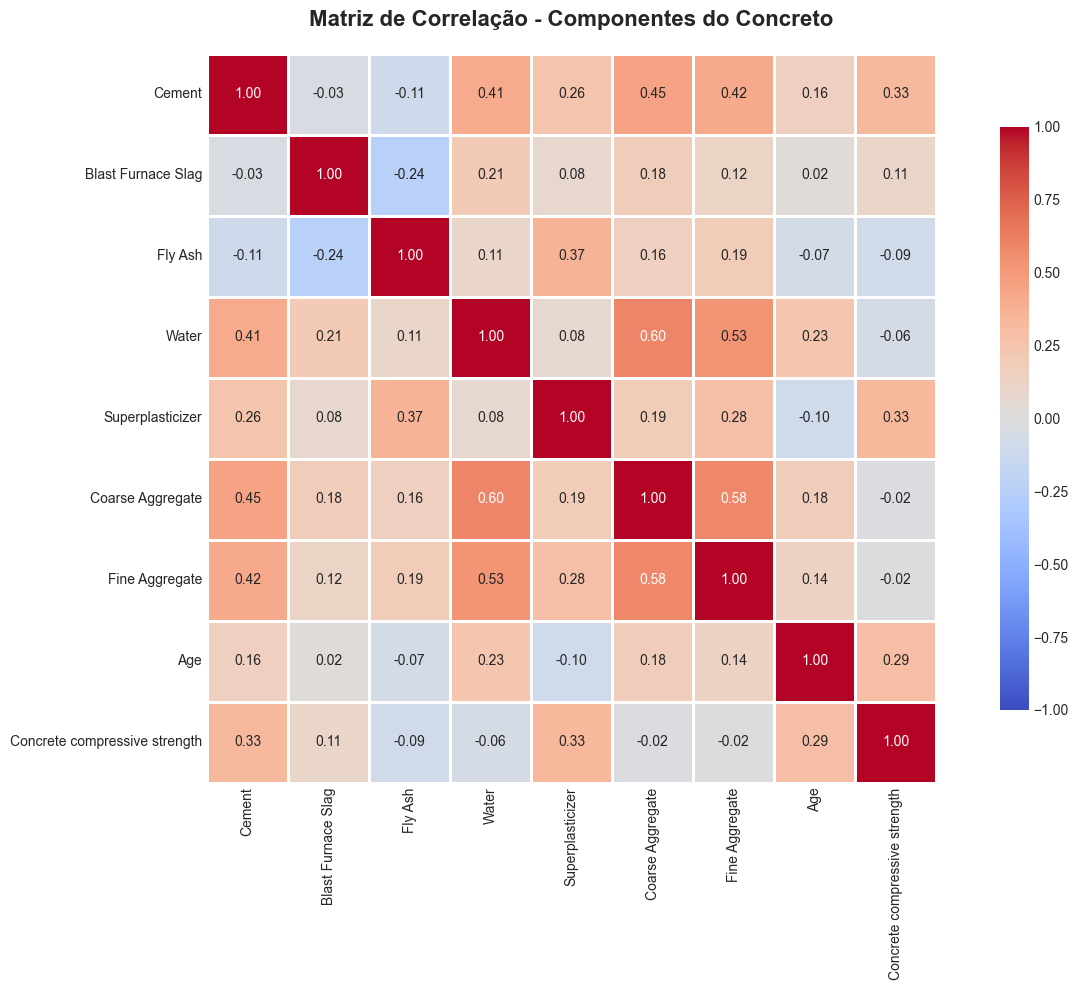


PARTE 1: CORRELAÇÕES COM A RESISTÊNCIA DO CONCRETO

📊 RANKING DE CORRELAÇÃO COM A RESISTÊNCIA:
#    Variável                       Correlação   Força           Direção
1    Superplasticizer               +0.3298      📊 MODERADA     ↗️ Positiva
2    Cement                         +0.3278      📊 MODERADA     ↗️ Positiva
3    Age                            +0.2902      📉 FRACA        ↗️ Positiva
4    Blast Furnace Slag             +0.1068      📉 FRACA        ↗️ Positiva
5    Fine Aggregate                 -0.0151      ❌ MUITO FRACA  ↘️ Negativa
6    Coarse Aggregate               -0.0172      ❌ MUITO FRACA  ↘️ Negativa
7    Water                          -0.0576      ❌ MUITO FRACA  ↘️ Negativa
8    Fly Ash                        -0.0894      ❌ MUITO FRACA  ↘️ Negativa


In [66]:
print("=" * 80)
print("ANÁLISE COMPLETA DE CORRELAÇÕES")
print("=" * 80)

# Selecionando apenas colunas numéricas
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Calculando a matriz de correlação
correlation_matrix = df_clean[numeric_columns].corr()

# Visualização da matriz de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, 
            annot=True,          # Mostra os valores
            fmt='.2f',           # Formato com 2 casas decimais
            cmap='coolwarm',     # Esquema de cores (azul=negativo, vermelho=positivo)
            center=0,            # Centraliza a escala em 0
            square=True,         # Células quadradas
            linewidths=1,        # Linhas entre células
            cbar_kws={"shrink": 0.8},  # Ajusta a barra de cores
            vmin=-1, vmax=1)     # Escala de -1 a 1

plt.title('Matriz de Correlação - Componentes do Concreto', 
          fontsize=16, 
          fontweight='bold',
          pad=20)
plt.tight_layout()
plt.show()

# ============================================================================
# PARTE 1: CORRELAÇÕES COM A VARIÁVEL ALVO (RESISTÊNCIA)
# ============================================================================

print("\n" + "=" * 60)
print("PARTE 1: CORRELAÇÕES COM A RESISTÊNCIA DO CONCRETO")
print("=" * 60)

# Selecionando apenas colunas numéricas
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns.tolist()

# Calculando a matriz de correlação
correlation_matrix = df_clean[numeric_columns].corr()

# Correlação com a variável alvo
target_correlation = correlation_matrix['Concrete compressive strength'].sort_values(ascending=False)
target_correlation_filtered = target_correlation[target_correlation.index != 'Concrete compressive strength']

print("\n📊 RANKING DE CORRELAÇÃO COM A RESISTÊNCIA:")
print("=" * 80)
print(f"{'#':<4} {'Variável':<30} {'Correlação':<12} {'Força':<15} {'Direção'}")
print("=" * 80)

for i, (feature, corr_value) in enumerate(target_correlation_filtered.items(), 1):
    # Classificação da correlação
    if abs(corr_value) >= 0.7:
        strength = "MUITO FORTE"
        emoji = "🔥"
    elif abs(corr_value) >= 0.5:
        strength = "FORTE"
        emoji = "💪"
    elif abs(corr_value) >= 0.3:
        strength = "MODERADA"
        emoji = "📊"
    elif abs(corr_value) >= 0.1:
        strength = "FRACA"
        emoji = "📉"
    else:
        strength = "MUITO FRACA"
        emoji = "❌"
    
    direction = "↗️ Positiva" if corr_value > 0 else "↘️ Negativa"
    
    print(f"{i:<4} {feature:<30} {corr_value:+.4f}      {emoji} {strength:<12} {direction}")

In [57]:
# ============================================================================
# PARTE 2: TOP 10 CORRELAÇÕES ENTRE TODAS AS VARIÁVEIS
# ============================================================================

print("\n" + "=" * 60)
print("PARTE 2: TOP 10 CORRELAÇÕES MAIS FORTES (TODAS AS VARIÁVEIS)")
print("=" * 60)

# Extraindo todas as correlações (exceto diagonal)
correlations_list = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlations_list.append({
            'Variável 1': var1,
            'Variável 2': var2,
            'Correlação': corr_value,
            'Abs_Correlação': abs(corr_value)
        })

# Convertendo para DataFrame e ordenando
correlations_df = pd.DataFrame(correlations_list)
correlations_df = correlations_df.sort_values('Abs_Correlação', ascending=False)

print("\n📊 TOP 10 PARES COM MAIOR CORRELAÇÃO:")
print("=" * 90)
print(f"{'#':<4} {'Variável 1':<30} {'Variável 2':<30} {'Correlação':<12}")
print("=" * 90)

for idx, row in correlations_df.head(10).iterrows():
    emoji = "🔥" if row['Abs_Correlação'] >= 0.5 else "📊"
    print(f"{correlations_df.head(10).index.tolist().index(idx)+1:<4} {row['Variável 1']:<30} {row['Variável 2']:<30} {emoji} {row['Correlação']:+.4f}")



PARTE 2: TOP 10 CORRELAÇÕES MAIS FORTES (TODAS AS VARIÁVEIS)

📊 TOP 10 PARES COM MAIOR CORRELAÇÃO:
#    Variável 1                     Variável 2                     Correlação  
1    Water                          Coarse Aggregate               🔥 +0.5969
2    Coarse Aggregate               Fine Aggregate                 🔥 +0.5807
3    Water                          Fine Aggregate                 🔥 +0.5296
4    Cement                         Coarse Aggregate               📊 +0.4484
5    Cement                         Fine Aggregate                 📊 +0.4213
6    Cement                         Water                          📊 +0.4134
7    Fly Ash                        Superplasticizer               📊 +0.3652
8    Superplasticizer               Concrete compressive strength  📊 +0.3298
9    Cement                         Concrete compressive strength  📊 +0.3278
10   Age                            Concrete compressive strength  📊 +0.2902


In [60]:
# ============================================================================
# PARTE 3: ANÁLISE DE MULTICOLINEARIDADE (PROBLEMA PARA REGRESSÃO LINEAR)
# ============================================================================

print("\n" + "=" * 60)
print("PARTE 3: ANÁLISE DE MULTICOLINEARIDADE")
print("=" * 60)

print("\n🔍 PARES COM CORRELAÇÃO > 0.50 (ALTA MULTICOLINEARIDADE):")
print("=" * 90)

high_corr = correlations_df[correlations_df['Abs_Correlação'] > 0.50]

if len(high_corr) > 0:
    print(f"\n⚠️  Encontrados {len(high_corr)} pares com alta correlação!\n")
    for idx, row in high_corr.iterrows():
        print(f"• {row['Variável 1']} ↔️ {row['Variável 2']}: {row['Correlação']:+.4f}")
    
    print("\n💡 INTERPRETAÇÃO:")
    print("   - Essas variáveis são altamente correlacionadas entre si")
    print("   - Em Regressão Linear, isso pode causar instabilidade nos coeficientes")
    print("   - Modelos baseados em árvore (Random Forest, XGBoost) lidam melhor com isso")
    print("   - Considere usar PCA ou seleção de features se usar Regressão Linear")
else:
    print("✓ Não há multicolinearidade severa (> 0.50)")


PARTE 3: ANÁLISE DE MULTICOLINEARIDADE

🔍 PARES COM CORRELAÇÃO > 0.50 (ALTA MULTICOLINEARIDADE):

⚠️  Encontrados 3 pares com alta correlação!

• Water ↔️ Coarse Aggregate: +0.5969
• Coarse Aggregate ↔️ Fine Aggregate: +0.5807
• Water ↔️ Fine Aggregate: +0.5296

💡 INTERPRETAÇÃO:
   - Essas variáveis são altamente correlacionadas entre si
   - Em Regressão Linear, isso pode causar instabilidade nos coeficientes
   - Modelos baseados em árvore (Random Forest, XGBoost) lidam melhor com isso
   - Considere usar PCA ou seleção de features se usar Regressão Linear


In [63]:
# ============================================================================
# PARTE 4: INSIGHTS ESPECÍFICOS PARA ENGENHARIA DE MATERIAIS
# ============================================================================

print("\n" + "=" * 50)
print("PARTE 4: INSIGHTS PARA ENGENHARIA DE MATERIAIS")
print("=" * 50)

print("\n📋 ANÁLISE DOS COMPONENTES DO CONCRETO:\n")

# Cimento
cement_corr = correlation_matrix.loc['Cement', 'Concrete compressive strength']
print(f"1️⃣  CIMENTO (Cement):")
print(f"   • Correlação com resistência: {cement_corr:+.4f}")
print(f"   • Interpretação: {'Aumentar cimento AUMENTA resistência' if cement_corr > 0 else 'Relação negativa'}")

# Água
water_corr = correlation_matrix.loc['Water', 'Concrete compressive strength']
print(f"\n2️⃣  ÁGUA (Water):")
print(f"   • Correlação com resistência: {water_corr:+.4f}")
print(f"   • Interpretação: {'Aumentar água REDUZ resistência (fator água/cimento!)' if water_corr < 0 else 'Relação positiva'}")

# Superplastificante
super_corr = correlation_matrix.loc['Superplasticizer', 'Concrete compressive strength']
print(f"\n3️⃣  SUPERPLASTIFICANTE (Superplasticizer):")
print(f"   • Correlação com resistência: {super_corr:+.4f}")
print(f"   • Interpretação: {'Melhora trabalhabilidade E resistência' if super_corr > 0 else 'Relação negativa'}")

# Idade
age_corr = correlation_matrix.loc['Age', 'Concrete compressive strength']
print(f"\n4️⃣  IDADE (Age):")
print(f"   • Correlação com resistência: {age_corr:+.4f}")
print(f"   • Interpretação: {'Cura ao longo do tempo AUMENTA resistência' if age_corr > 0 else 'Relação negativa'}")

# Agregados
coarse_corr = correlation_matrix.loc['Coarse Aggregate', 'Concrete compressive strength']
fine_corr = correlation_matrix.loc['Fine Aggregate', 'Concrete compressive strength']
print(f"\n5️⃣  AGREGADOS:")
print(f"   • Agregado Graúdo: {coarse_corr:+.4f}")
print(f"   • Agregado Miúdo: {fine_corr:+.4f}")
print(f"   • Interpretação: Impacto muito baixo na resistência")

print("\n" + "=" * 80)
print("✓ ANÁLISE COMPLETA CONCLUÍDA!")
print("=" * 80)


PARTE 4: INSIGHTS PARA ENGENHARIA DE MATERIAIS

📋 ANÁLISE DOS COMPONENTES DO CONCRETO:

1️⃣  CIMENTO (Cement):
   • Correlação com resistência: +0.3278
   • Interpretação: Aumentar cimento AUMENTA resistência

2️⃣  ÁGUA (Water):
   • Correlação com resistência: -0.0576
   • Interpretação: Aumentar água REDUZ resistência (fator água/cimento!)

3️⃣  SUPERPLASTIFICANTE (Superplasticizer):
   • Correlação com resistência: +0.3298
   • Interpretação: Melhora trabalhabilidade E resistência

4️⃣  IDADE (Age):
   • Correlação com resistência: +0.2902
   • Interpretação: Cura ao longo do tempo AUMENTA resistência

5️⃣  AGREGADOS:
   • Agregado Graúdo: -0.0172
   • Agregado Miúdo: -0.0151
   • Interpretação: Impacto muito baixo na resistência

✓ ANÁLISE COMPLETA CONCLUÍDA!


### Passo 2.2: Visualizações Avançadas - Relações com a Resistência


VISUALIZAÇÕES: RELAÇÃO DOS COMPONENTES COM A RESISTÊNCIA


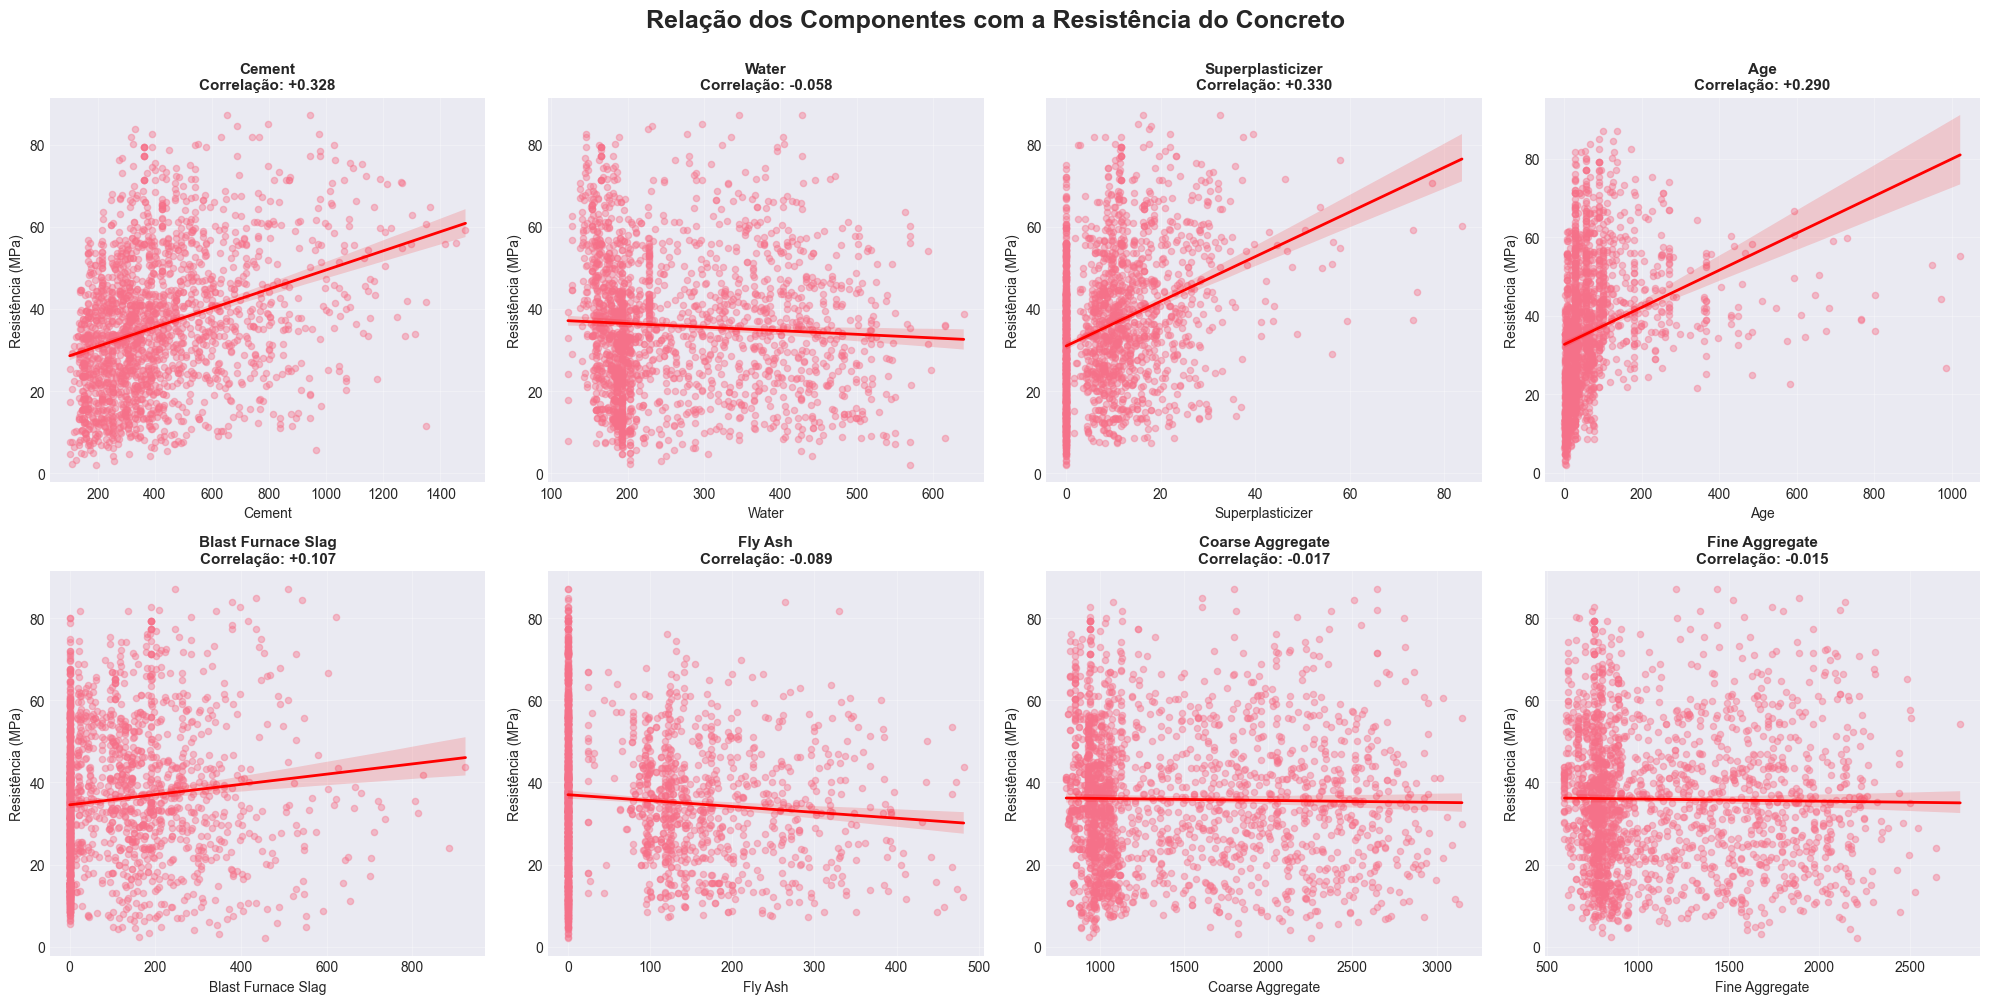

In [68]:
print("=" * 80)
print("VISUALIZAÇÕES: RELAÇÃO DOS COMPONENTES COM A RESISTÊNCIA")
print("=" * 80)

# Configuração de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Criando figura com subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Relação dos Componentes com a Resistência do Concreto', 
             fontsize=18, fontweight='bold', y=1.00)

# Lista de features para plotar
features = ['Cement', 'Water', 'Superplasticizer', 'Age', 
            'Blast Furnace Slag', 'Fly Ash', 'Coarse Aggregate', 'Fine Aggregate']

target = 'Concrete compressive strength'

# Criando scatter plots
for idx, feature in enumerate(features):
    row = idx // 4
    col = idx % 4
    ax = axes[row, col]
    
    # Scatter plot com linha de tendência
    sns.regplot(data=df_clean, 
                x=feature, 
                y=target,
                ax=ax,
                scatter_kws={'alpha': 0.4, 's': 20},
                line_kws={'color': 'red', 'linewidth': 2})
    
    # Calculando correlação
    corr = df_clean[feature].corr(df_clean[target])
    
    # Título com correlação
    ax.set_title(f'{feature}\nCorrelação: {corr:+.3f}', 
                 fontsize=11, fontweight='bold')
    
    # Labels
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Resistência (MPa)', fontsize=10)
    
    # Grid
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


COMPARAÇÃO: COMPONENTES EM CONCRETOS DE ALTA vs BAIXA RESISTÊNCIA


C:\Users\bianc\AppData\Local\Temp\ipykernel_15808\3603094095.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean,
C:\Users\bianc\AppData\Local\Temp\ipykernel_15808\3603094095.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean,
C:\Users\bianc\AppData\Local\Temp\ipykernel_15808\3603094095.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean,
C:\Users\bianc\AppData\Local\Temp\ipykernel_15808\3603094095.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

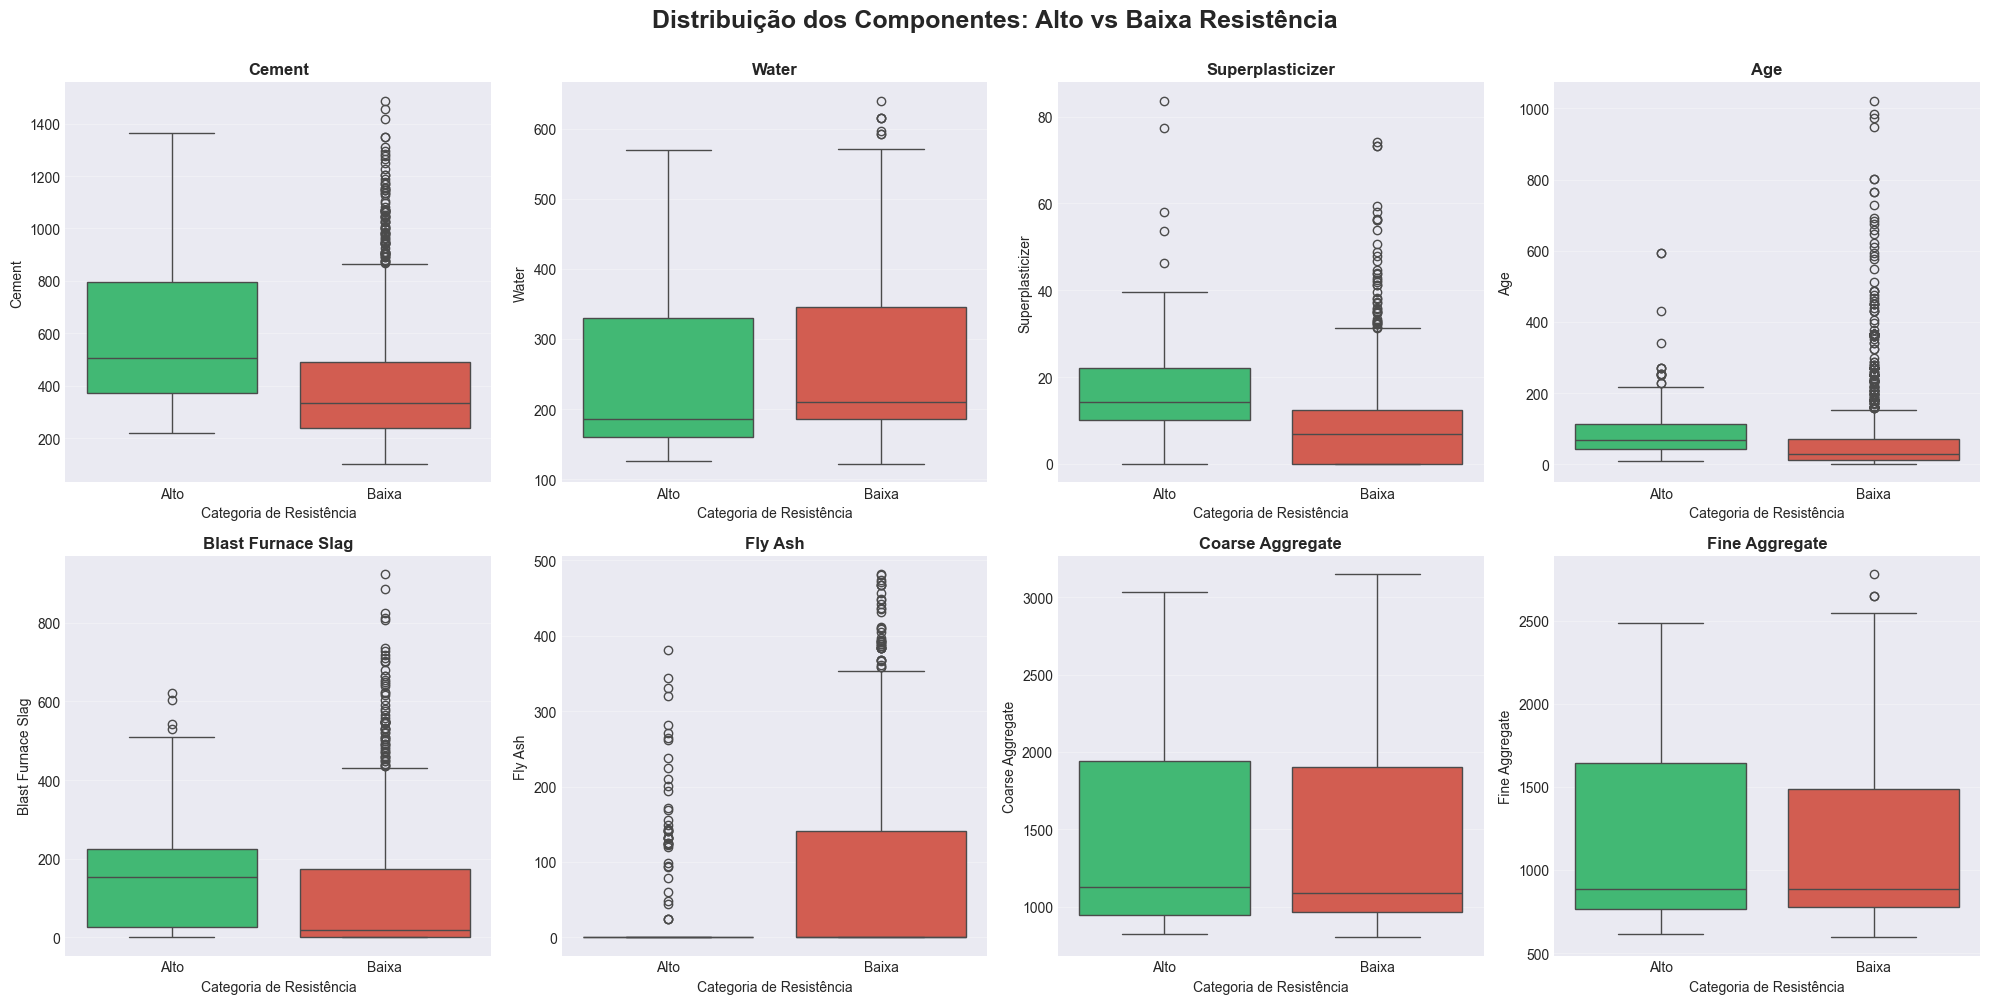

In [69]:
# ============================================================================
# GRÁFICO 2: BOXPLOTS POR CATEGORIA DE RESISTÊNCIA
# ============================================================================

print("\n" + "=" * 80)
print("COMPARAÇÃO: COMPONENTES EM CONCRETOS DE ALTA vs BAIXA RESISTÊNCIA")
print("=" * 80)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribuição dos Componentes: Alto vs Baixa Resistência', 
             fontsize=18, fontweight='bold', y=1.00)

for idx, feature in enumerate(features):
    row = idx // 4
    col = idx % 4
    ax = axes[row, col]
    
    # Boxplot
    sns.boxplot(data=df_clean, 
                x='Strength Category', 
                y=feature,
                ax=ax,
                palette={'Alto': '#2ecc71', 'Baixa': '#e74c3c'})
    
    # Título
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    
    # Labels
    ax.set_xlabel('Categoria de Resistência', fontsize=10)
    ax.set_ylabel(f'{feature}', fontsize=10)
    
    # Grid
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [72]:
# ============================================================================
# ESTATÍSTICAS COMPARATIVAS
# ============================================================================

print("\n" + "=" * 80)
print("ESTATÍSTICAS: ALTO vs BAIXA RESISTÊNCIA")
print("=" * 80)

# Separando por categoria
df_alto = df_clean[df_clean['Strength Category'] == 'Alto']
df_baixa = df_clean[df_clean['Strength Category'] == 'Baixa']

print(f"\n📊 Amostras: Alto = {len(df_alto)} | Baixa = {len(df_baixa)}\n")

comparison_data = []

for feature in features:
    media_alto = df_alto[feature].mean()
    media_baixa = df_baixa[feature].mean()
    diferenca = media_alto - media_baixa
    percentual = (diferenca / media_baixa * 100) if media_baixa != 0 else 0
    
    comparison_data.append({
        'Componente': feature,
        'Média Alto': media_alto,
        'Média Baixa': media_baixa,
        'Diferença': diferenca,
        'Variação %': percentual
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Variação %', ascending=False)

print("=" * 100)
print(f"{'Componente':<25} {'Média Alto':<15} {'Média Baixa':<15} {'Diferença':<15} {'Variação %'}")
print("=" * 100)

for _, row in comparison_df.iterrows():
    emoji = "📈" if row['Variação %'] > 0 else "📉"
    print(f"{row['Componente']:<25} {row['Média Alto']:>12.2f}   {row['Média Baixa']:>12.2f}   "
          f"{row['Diferença']:>12.2f}   {emoji} {row['Variação %']:>+7.2f}%")

print("=" * 100)




ESTATÍSTICAS: ALTO vs BAIXA RESISTÊNCIA

📊 Amostras: Alto = 189 | Baixa = 1831

Componente                Média Alto      Média Baixa     Diferença       Variação %
Superplasticizer                 16.57           8.25           8.33   📈 +100.96%
Blast Furnace Slag              165.71         101.45          64.25   📈  +63.34%
Cement                          599.09         396.30         202.79   📈  +51.17%
Age                              92.93          64.75          28.19   📈  +43.53%
Fine Aggregate                 1190.13        1133.47          56.65   📈   +5.00%
Coarse Aggregate               1424.50        1445.06         -20.56   📉   -1.42%
Water                           242.10         266.04         -23.94   📉   -9.00%
Fly Ash                          36.34          82.48         -46.14   📉  -55.94%


In [71]:
# Insights
print("\n💡 PRINCIPAIS INSIGHTS:\n")

max_increase = comparison_df.iloc[0]
print(f"1. {max_increase['Componente']} tem a MAIOR diferença entre Alto e Baixa:")
print(f"   • Concretos de alta resistência usam {abs(max_increase['Variação %']):.1f}% "
      f"{'mais' if max_increase['Variação %'] > 0 else 'menos'} {max_increase['Componente']}")

min_increase = comparison_df.iloc[-1]
print(f"\n2. {min_increase['Componente']} tem a MENOR diferença:")
print(f"   • Variação de apenas {abs(min_increase['Variação %']):.1f}%")

print("\n" + "=" * 80)
print("✓ VISUALIZAÇÕES CONCLUÍDAS!")
print("=" * 80)


💡 PRINCIPAIS INSIGHTS:

1. Superplasticizer tem a MAIOR diferença entre Alto e Baixa:
   • Concretos de alta resistência usam 101.0% mais Superplasticizer

2. Fly Ash tem a MENOR diferença:
   • Variação de apenas 55.9%

✓ VISUALIZAÇÕES CONCLUÍDAS!


INVESTIGAÇÃO: POR QUE ÁGUA TEM DIFERENÇA TÃO PEQUENA? (VERSÃO CORRIGIDA)

📊 COMPARAÇÃO: ÁGUA vs RELAÇÃO ÁGUA/CIMENTO

1️⃣  ÁGUA (quantidade absoluta):
   • Alto:  242.10 kg/m³
   • Baixa: 266.04 kg/m³
   • Diferença: -9.00%

2️⃣  RELAÇÃO ÁGUA/CIMENTO:
   • Alto:  0.4396
   • Baixa: 0.7992
   • Diferença: -44.99%

💡 INSIGHT CRÍTICO:

A quantidade ABSOLUTA de água varia apenas -9.0%, mas a RELAÇÃO 
água/cimento varia -45.0%!

Por quê?
• Concretos de alta resistência usam MUITO MAIS cimento (+51%)
• Mesmo usando quantidade similar de água, a PROPORÇÃO água/cimento é menor
• É a RELAÇÃO que importa, não a quantidade absoluta!

Exemplo prático:
• Baixa: 266 kg água ÷ 396 kg cimento = 0.799 (relação alta)
• Alto:  242 kg água ÷ 599 kg cimento = 0.440 (relação baixa)

Conclusão: Concretos de alta resistência têm relação água/cimento 45.0% MENOR!



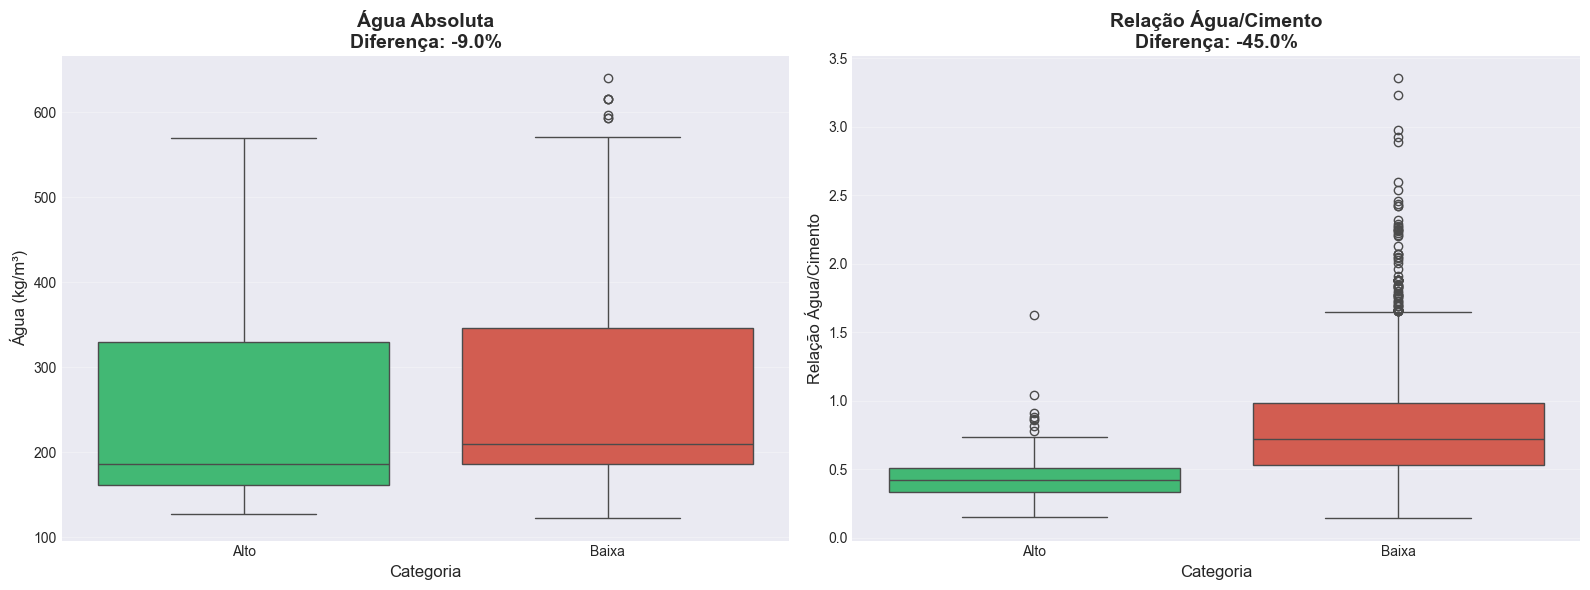


✓ Análise concluída SEM WARNINGS!

📊 Amostras: Alto = {len(df_alto)} | Baixa = {len(df_baixa)}



In [74]:
print("=" * 80)
print("INVESTIGAÇÃO: POR QUE ÁGUA TEM DIFERENÇA TÃO PEQUENA? (VERSÃO CORRIGIDA)")
print("=" * 80)

# Criando a coluna no DataFrame principal ANTES de separar
df_clean['Water_Cement_Ratio'] = df_clean['Water'] / df_clean['Cement']

# Agora separando os grupos (sem warnings!)
df_alto = df_clean[df_clean['Strength Category'] == 'Alto'].copy()
df_baixa = df_clean[df_clean['Strength Category'] == 'Baixa'].copy()

print("\n📊 COMPARAÇÃO: ÁGUA vs RELAÇÃO ÁGUA/CIMENTO\n")

# Água absoluta
water_alto = df_alto['Water'].mean()
water_baixa = df_baixa['Water'].mean()
water_diff_pct = ((water_alto - water_baixa) / water_baixa) * 100

print("1️⃣  ÁGUA (quantidade absoluta):")
print(f"   • Alto:  {water_alto:.2f} kg/m³")
print(f"   • Baixa: {water_baixa:.2f} kg/m³")
print(f"   • Diferença: {water_diff_pct:+.2f}%")

# Relação água/cimento
wc_alto = df_alto['Water_Cement_Ratio'].mean()
wc_baixa = df_baixa['Water_Cement_Ratio'].mean()
wc_diff_pct = ((wc_alto - wc_baixa) / wc_baixa) * 100

print("\n2️⃣  RELAÇÃO ÁGUA/CIMENTO:")
print(f"   • Alto:  {wc_alto:.4f}")
print(f"   • Baixa: {wc_baixa:.4f}")
print(f"   • Diferença: {wc_diff_pct:+.2f}%")

print("\n" + "=" * 80)
print("💡 INSIGHT CRÍTICO:")
print("=" * 80)

print(f"""
A quantidade ABSOLUTA de água varia apenas {water_diff_pct:.1f}%, mas a RELAÇÃO 
água/cimento varia {wc_diff_pct:.1f}%!

Por quê?
• Concretos de alta resistência usam MUITO MAIS cimento (+51%)
• Mesmo usando quantidade similar de água, a PROPORÇÃO água/cimento é menor
• É a RELAÇÃO que importa, não a quantidade absoluta!

Exemplo prático:
• Baixa: 266 kg água ÷ 396 kg cimento = {wc_baixa:.3f} (relação alta)
• Alto:  242 kg água ÷ 599 kg cimento = {wc_alto:.3f} (relação baixa)

Conclusão: Concretos de alta resistência têm relação água/cimento {abs(wc_diff_pct):.1f}% MENOR!
""")

# Visualização (SEM WARNINGS!)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Água absoluta
ax1 = axes[0]
sns.boxplot(data=df_clean, x='Strength Category', y='Water', ax=ax1,
            hue='Strength Category', palette={'Alto': '#2ecc71', 'Baixa': '#e74c3c'},
            legend=False)
ax1.set_title(f'Água Absoluta\nDiferença: {water_diff_pct:+.1f}%', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Água (kg/m³)', fontsize=12)
ax1.set_xlabel('Categoria', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Relação água/cimento
ax2 = axes[1]
sns.boxplot(data=df_clean, x='Strength Category', y='Water_Cement_Ratio', ax=ax2,
            hue='Strength Category', palette={'Alto': '#2ecc71', 'Baixa': '#e74c3c'},
            legend=False)
ax2.set_title(f'Relação Água/Cimento\nDiferença: {wc_diff_pct:+.1f}%', 
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Relação Água/Cimento', fontsize=12)
ax2.set_xlabel('Categoria', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Análise concluída SEM WARNINGS!")

print("\n📊 Amostras: Alto = {len(df_alto)} | Baixa = {len(df_baixa)}\n")

### Passo 2.3: Análise da Idade (Cura do Concreto)

ANÁLISE TEMPORAL: EVOLUÇÃO DA RESISTÊNCIA COM A IDADE

📊 RESISTÊNCIA POR IDADE (dias):
   Age  Média  Desvio Padrão  Mínimo  Máximo  Quantidade
   1.0   9.46           4.50    6.27   12.64           2
   1.2  11.40            NaN   11.40   11.40           1
   2.2   5.60            NaN    5.60    5.60           1
   3.0  18.98           9.86    2.33   41.64         134
   3.3  19.23          14.44    3.00   45.20           7
   3.6  23.22           7.55   11.00   33.80           6
   3.9  19.10           6.19    9.70   25.00           6
   4.2  18.00           9.34    4.30   37.20          10
   4.5  21.17          12.86    9.00   39.30           4
   4.8  25.34           8.98   15.50   36.70           7
   5.1  18.81          13.33    2.10   38.80           9
   5.4  24.86          12.67   12.40   41.60           5
   5.7  21.07          11.12    7.70   41.60           9
   6.0  15.27           8.54    5.40   31.10           9
   6.3  20.43          10.81    7.10   38.80           9
 

C:\Users\bianc\AppData\Local\Temp\ipykernel_15808\37727801.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Age', y='Concrete compressive strength',


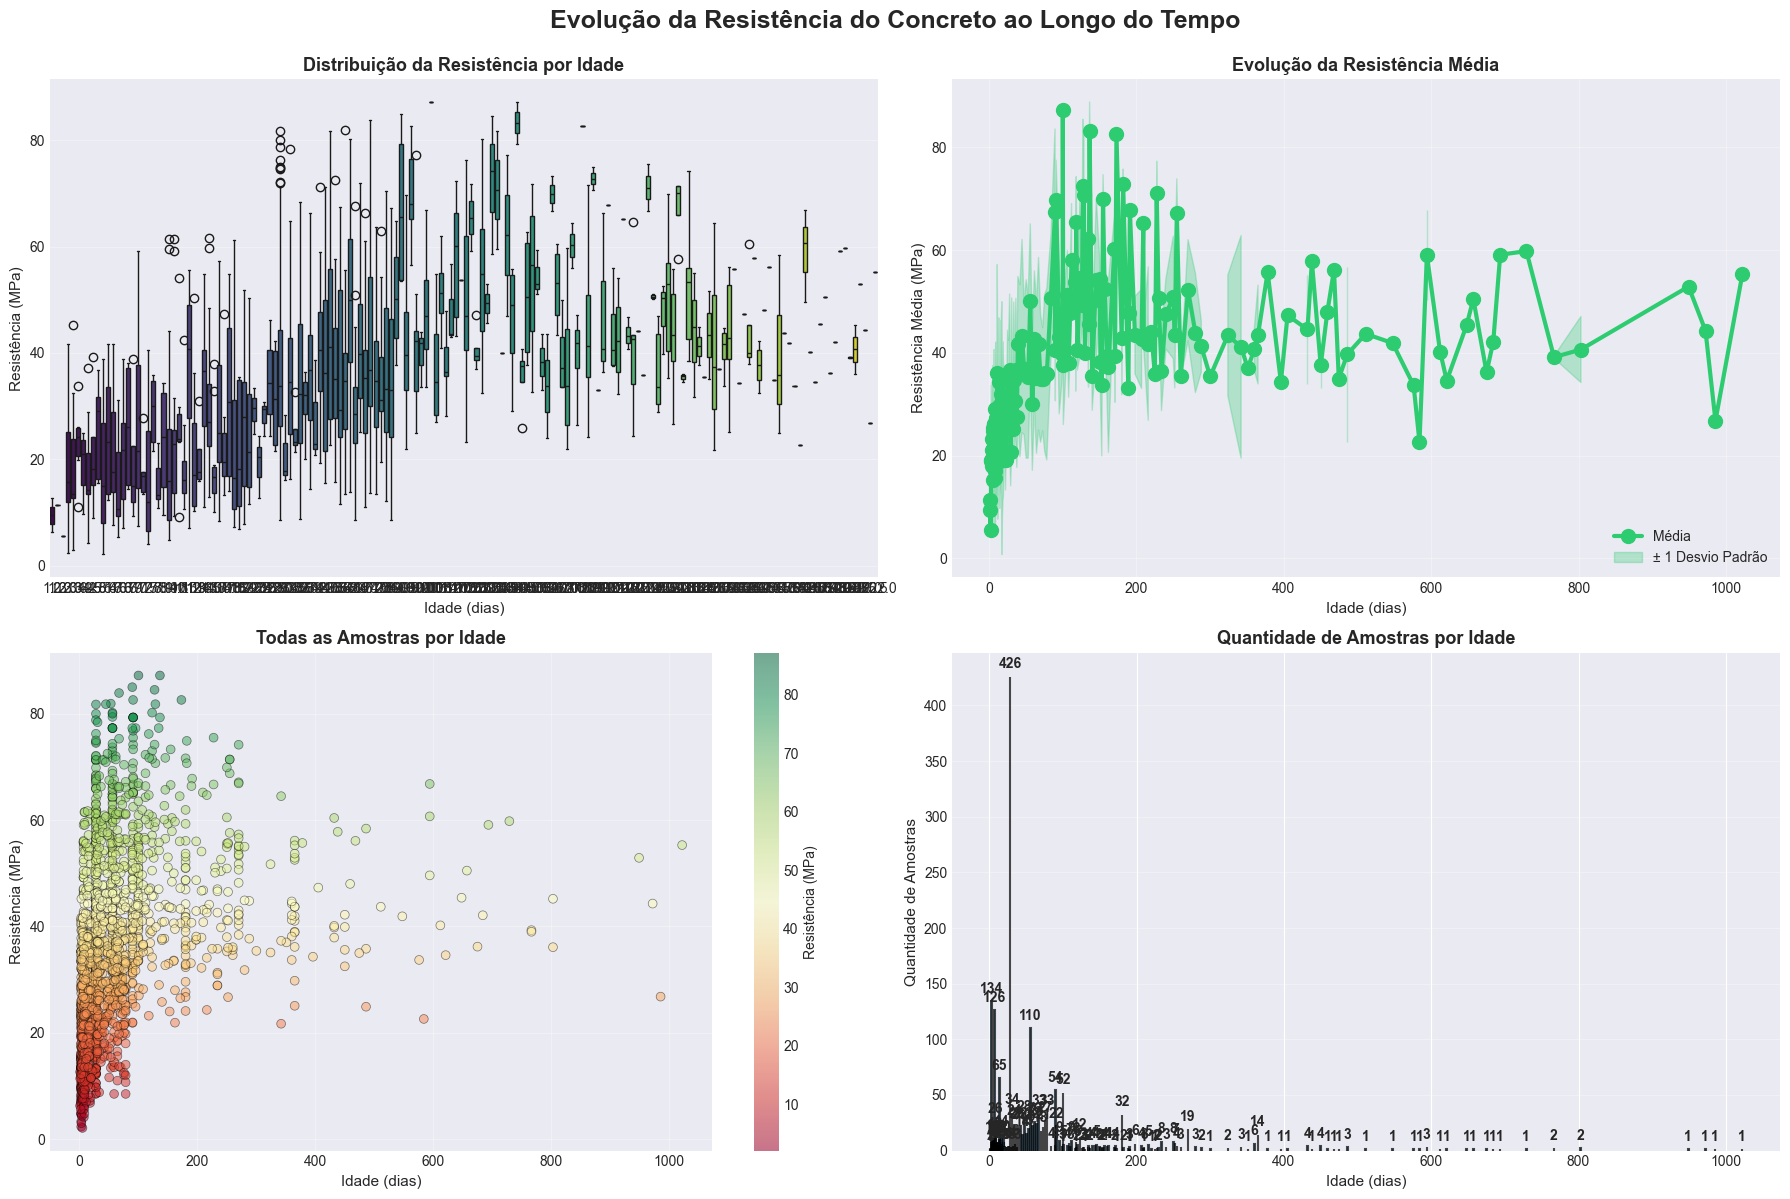


ANÁLISE DE GANHO DE RESISTÊNCIA

📊 Resistência base (idade 1 dias): 9.46 MPa

Idade (dias)    Resistência (MPa)    Ganho Absoluto       Ganho %
1               9.46                 0.00                 ➖   +0.00%
1               11.40                1.94                 📈  +20.51%
2               5.60                 -3.86                ➖  -40.80%
3               18.98                9.52                 🚀 +100.63%
3               19.23                9.77                 🚀 +103.28%
4               23.22                13.76                🚀 +145.45%
4               19.10                9.64                 🚀 +101.90%
4               18.00                8.54                 🚀  +90.27%
4               21.17                11.71                🚀 +123.78%
5               25.34                15.88                🚀 +167.86%
5               18.81                9.35                 🚀  +98.84%
5               24.86                15.40                🚀 +162.79%
6               21.07      

In [75]:
print("=" * 80)
print("ANÁLISE TEMPORAL: EVOLUÇÃO DA RESISTÊNCIA COM A IDADE")
print("=" * 80)

# Estatísticas por idade
age_analysis = df_clean.groupby('Age').agg({
    'Concrete compressive strength': ['mean', 'std', 'min', 'max', 'count']
}).round(2)

age_analysis.columns = ['Média', 'Desvio Padrão', 'Mínimo', 'Máximo', 'Quantidade']
age_analysis = age_analysis.reset_index()
age_analysis = age_analysis.sort_values('Age')

print("\n📊 RESISTÊNCIA POR IDADE (dias):")
print("=" * 95)
print(age_analysis.to_string(index=False))

# ============================================================================
# VISUALIZAÇÕES
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Evolução da Resistência do Concreto ao Longo do Tempo', 
             fontsize=18, fontweight='bold', y=0.995)

# Gráfico 1: Boxplot por idade
ax1 = axes[0, 0]
ages_sorted = sorted(df_clean['Age'].unique())
sns.boxplot(data=df_clean, x='Age', y='Concrete compressive strength', 
            order=ages_sorted, ax=ax1, palette='viridis')
ax1.set_title('Distribuição da Resistência por Idade', fontsize=13, fontweight='bold')
ax1.set_xlabel('Idade (dias)', fontsize=11)
ax1.set_ylabel('Resistência (MPa)', fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Evolução da média com área de desvio padrão
ax2 = axes[0, 1]
ax2.plot(age_analysis['Age'], age_analysis['Média'], 
         marker='o', linewidth=3, markersize=10, color='#2ecc71', label='Média')
ax2.fill_between(age_analysis['Age'], 
                  age_analysis['Média'] - age_analysis['Desvio Padrão'],
                  age_analysis['Média'] + age_analysis['Desvio Padrão'],
                  alpha=0.3, color='#2ecc71', label='± 1 Desvio Padrão')
ax2.set_title('Evolução da Resistência Média', fontsize=13, fontweight='bold')
ax2.set_xlabel('Idade (dias)', fontsize=11)
ax2.set_ylabel('Resistência Média (MPa)', fontsize=11)
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.3)

# Gráfico 3: Scatter plot com todas as amostras
ax3 = axes[1, 0]
scatter = ax3.scatter(df_clean['Age'], df_clean['Concrete compressive strength'],
                     c=df_clean['Concrete compressive strength'], 
                     cmap='RdYlGn', alpha=0.5, s=40, edgecolors='black', linewidths=0.5)
ax3.set_title('Todas as Amostras por Idade', fontsize=13, fontweight='bold')
ax3.set_xlabel('Idade (dias)', fontsize=11)
ax3.set_ylabel('Resistência (MPa)', fontsize=11)
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='Resistência (MPa)')

# Gráfico 4: Distribuição de amostras por idade
ax4 = axes[1, 1]
age_counts = df_clean['Age'].value_counts().sort_index()
bars = ax4.bar(age_counts.index, age_counts.values, color='#3498db', 
               alpha=0.7, edgecolor='black', linewidth=1.5)
ax4.set_title('Quantidade de Amostras por Idade', fontsize=13, fontweight='bold')
ax4.set_xlabel('Idade (dias)', fontsize=11)
ax4.set_ylabel('Quantidade de Amostras', fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

# Adicionando valores nas barras
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================================
# ANÁLISE DE GANHO DE RESISTÊNCIA
# ============================================================================

print("\n" + "=" * 80)
print("ANÁLISE DE GANHO DE RESISTÊNCIA")
print("=" * 80)

if len(age_analysis) > 1:
    base_strength = age_analysis.iloc[0]['Média']
    
    print(f"\n📊 Resistência base (idade {age_analysis.iloc[0]['Age']:.0f} dias): {base_strength:.2f} MPa\n")
    print("=" * 85)
    print(f"{'Idade (dias)':<15} {'Resistência (MPa)':<20} {'Ganho Absoluto':<20} {'Ganho %'}")
    print("=" * 85)
    
    for _, row in age_analysis.iterrows():
        age = row['Age']
        strength = row['Média']
        gain_abs = strength - base_strength
        gain_pct = (gain_abs / base_strength * 100) if base_strength > 0 else 0
        
        emoji = "🚀" if gain_pct > 50 else "📈" if gain_pct > 0 else "➖"
        print(f"{age:<15.0f} {strength:<20.2f} {gain_abs:<20.2f} {emoji} {gain_pct:>+7.2f}%")
    
    print("=" * 85)

# ============================================================================
# DISTRIBUIÇÃO DE AMOSTRAS
# ============================================================================

print("\n" + "=" * 80)
print("DISTRIBUIÇÃO DE AMOSTRAS POR IDADE")
print("=" * 80)

print(f"\n📊 Total de amostras: {len(df_clean)}\n")

for age, count in age_counts.items():
    percentage = (count / len(df_clean)) * 100
    bar = "█" * int(percentage / 2)
    print(f"   {age:>3.0f} dias: {count:>4} amostras ({percentage:>5.2f}%) {bar}")

# ============================================================================
# INSIGHTS FINAIS
# ============================================================================

print("\n" + "=" * 80)
print("💡 INSIGHTS SOBRE A EVOLUÇÃO TEMPORAL")
print("=" * 80)

# Calculando taxa de ganho
if len(age_analysis) >= 2:
    first_age = age_analysis.iloc[0]
    last_age = age_analysis.iloc[-1]
    
    total_gain = last_age['Média'] - first_age['Média']
    total_gain_pct = (total_gain / first_age['Média']) * 100
    time_span = last_age['Age'] - first_age['Age']
    
    print(f"""
1️⃣  GANHO TOTAL DE RESISTÊNCIA:
   • De {first_age['Age']:.0f} para {last_age['Age']:.0f} dias: +{total_gain:.2f} MPa ({total_gain_pct:+.1f}%)
   • Taxa média: {total_gain/time_span:.2f} MPa por dia

2️⃣  IDADES MAIS TESTADAS:
   • {age_counts.index[0]:.0f} dias: {age_counts.iloc[0]} amostras ({age_counts.iloc[0]/len(df_clean)*100:.1f}%)
   • {age_counts.index[1]:.0f} dias: {age_counts.iloc[1]} amostras ({age_counts.iloc[1]/len(df_clean)*100:.1f}%)
   • {age_counts.index[2]:.0f} dias: {age_counts.iloc[2]} amostras ({age_counts.iloc[2]/len(df_clean)*100:.1f}%)

3️⃣  VARIABILIDADE:
   • Maior desvio padrão: {age_analysis['Desvio Padrão'].max():.2f} MPa (idade {age_analysis.loc[age_analysis['Desvio Padrão'].idxmax(), 'Age']:.0f} dias)
   • Menor desvio padrão: {age_analysis['Desvio Padrão'].min():.2f} MPa (idade {age_analysis.loc[age_analysis['Desvio Padrão'].idxmin(), 'Age']:.0f} dias)

4️⃣  INTERPRETAÇÃO PRÁTICA:
   • Concreto ganha resistência ao longo do tempo (hidratação do cimento)
   • Maior parte dos testes em {age_counts.index[0]:.0f} dias (padrão da indústria)
   • Alta variabilidade indica que a composição importa mais que a idade
    """)

print("=" * 80)
print("✓ ANÁLISE TEMPORAL CONCLUÍDA!")
print("=" * 80)
